# Discrete event simulation

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from server_queue import server_system

In [49]:
# Number of repeats of every simulation
repeats = 400

### Determine the number of jobs to reach a steady-state

#### System load = 0.1

In [4]:
n_jobs = [100, 1000, 10000]

arrival_rate = 0.5
service_time = 1/5

In [5]:
system = server_system(n_jobs[0], 1, arrival_rate, service_time, queue_model='fifo')

In [6]:
avg_waiting_time_1 = dict()

for n in n_jobs:
    avg_waiting_time_1['%s' % n] = []
    system.n_jobs = n
    
    for _ in range(repeats):
        system.run()
        avg_waiting_time_1['%s' % n].append(np.average(system.waiting_times))

#### System load = 0.4

In [10]:
arrival_rate = 2
service_time = 1/5

In [11]:
system.arrival_rate = arrival_rate

In [12]:
avg_waiting_time_4 = dict()

for n in n_jobs:
    avg_waiting_time_4['%s' % n] = []
    system.n_jobs = n
    
    for _ in range(repeats):
        system.run()
        avg_waiting_time_4['%s' % n].append(np.average(system.waiting_times))

#### System load = 0.8

In [41]:
arrival_rate = 4
service_time = 1/5

n_jobs = [1000, 10_000, 100_000]

In [42]:
system.arrival_rate = arrival_rate

In [43]:
avg_waiting_time_8 = dict()

for n in n_jobs:
    avg_waiting_time_8['%s' % n] = []
    system.n_jobs = n
    
    for _ in range(repeats):
        system.run()
        avg_waiting_time_8['%s' % n].append(np.average(system.waiting_times))

#### System load = 0.9

In [32]:
arrival_rate = 4.5
service_time = 1/5

n_jobs = [1000, 10_000, 100_000]

In [33]:
system.arrival_rate = arrival_rate

In [35]:
avg_waiting_time_9 = dict()

for n in n_jobs:
    avg_waiting_time_9['%s' % n] = []
    system.n_jobs = n
    
    for _ in range(repeats):
        system.run()
        avg_waiting_time_9['%s' % n].append(np.average(system.waiting_times))

#### Plot

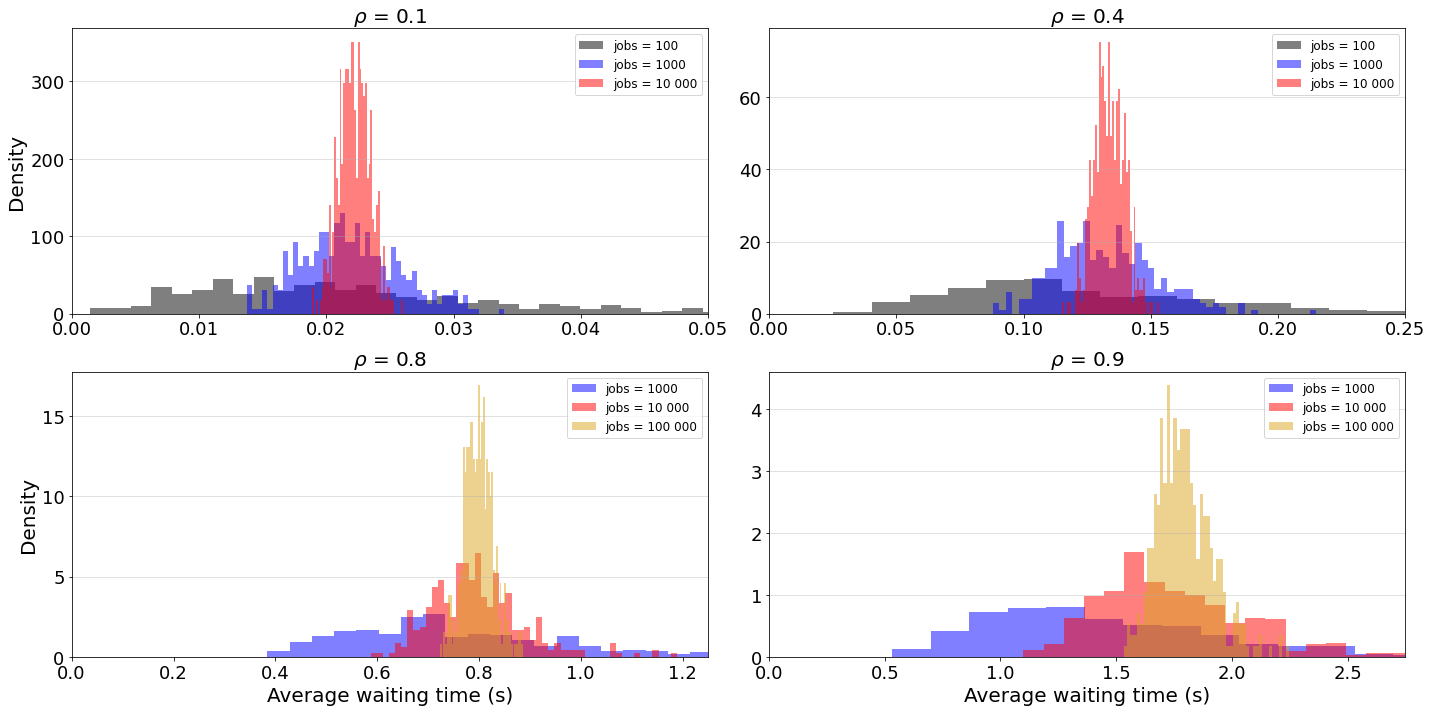

In [82]:
fig, axs = plt.subplots(2, 2, figsize = (20, 10))

axs[0, 0].tick_params(axis = 'both', labelsize = 18)
axs[1, 0].tick_params(axis = 'both', labelsize = 18)
axs[0, 1].tick_params(axis = 'both', labelsize = 18)
axs[1, 1].tick_params(axis = 'both', labelsize = 18)

# System load = 0.1
axs[0,0].hist(avg_waiting_time_1['100'], 50, color = 'black', alpha = 0.5, density = True, label = 'jobs = 100')
axs[0,0].hist(avg_waiting_time_1['1000'], 50, color = 'blue', alpha = 0.5, density = True, label = 'jobs = 1000')
axs[0,0].hist(avg_waiting_time_1['10000'], 50, color = 'red', alpha = 0.5, density = True, label = 'jobs = 10 000')
axs[0,0].set_xlim(0, 0.05)
axs[0,0].legend(loc = 'upper right', fontsize = 12)

# System load = 0.4
axs[0,1].hist(avg_waiting_time_4['100'], 50, color = 'black', alpha = 0.5, density = True, label = 'jobs = 100')
axs[0,1].hist(avg_waiting_time_4['1000'], 50, color = 'blue', alpha = 0.5, density = True, label = 'jobs = 1000')
axs[0,1].hist(avg_waiting_time_4['10000'], 50, color = 'red', alpha = 0.5, density = True, label = 'jobs = 10 000')
axs[0,1].set_xlim(0,0.25)
axs[0,1].legend(loc = 'upper right', fontsize = 12)

# System load = 0.8
axs[1,0].hist(avg_waiting_time_8['1000'], 50, color = 'blue', alpha = 0.5, density = True, label = 'jobs = 1000')
axs[1,0].hist(avg_waiting_time_8['10000'], 50, color = 'red', alpha = 0.5, density = True, label = 'jobs = 10 000')
axs[1,0].hist(avg_waiting_time_8['100000'], 50, color = 'goldenrod', alpha = 0.5, density = True, label = 'jobs = 100 000')
axs[1,0].set_xlim(0,1.25)
axs[1,0].legend(loc = 'upper right', fontsize = 12)

# System load = 0.9
axs[1,1].hist(avg_waiting_time_9['1000'], 50, color = 'blue', alpha = 0.5, density = True, label = 'jobs = 1000')
axs[1,1].hist(avg_waiting_time_9['10000'], 50, color = 'red', alpha = 0.5, density = True, label = 'jobs = 10 000')
axs[1,1].hist(avg_waiting_time_9['100000'], 50, color = 'goldenrod', alpha = 0.5, density = True, label = 'jobs = 100 000')
axs[1,1].set_xlim(0,2.75)
axs[1,1].legend(loc = 'upper right', fontsize = 12)

for ax in axs.flat:
    ax.grid(linewidth = .75, axis = 'y', alpha = 0.5)

axs[0,0].set_ylabel('Density', fontsize = 20)
axs[1,0].set_ylabel('Density', fontsize = 20)
axs[1,0].set_xlabel('Average waiting time (s)', fontsize = 20)
axs[1,1].set_xlabel('Average waiting time (s)', fontsize = 20)

axs[0,0].set_title(r'$\rho$ = 0.1', fontsize = 20)
axs[0,1].set_title(r'$\rho$ = 0.4', fontsize = 20)
axs[1,0].set_title(r'$\rho$ = 0.8', fontsize = 20)
axs[1,1].set_title(r'$\rho$ = 0.9', fontsize = 20)

plt.tight_layout()
plt.savefig('determine_n_jobs.pdf')
plt.show()

### Comparing an M/M/n queue and an M/M/1 queue

We will look at the difference in the average waiting times between a server system that has n servers, a system that has 1 server with an n-fold lower arrival rate and a system that has 1 server with an n-fold lower arrival rate but gives priority to the shortest job. We will do this for different values of n and different system loads.

#### System load = 0.1

In [50]:
# Settings of the system
n_jobs = 10_000
n_servers = [1,2,4]

arrival_rate = 0.5
service_time = 1/5

In [51]:
# Creating the M/M/n system with n = 1
system_n = server_system(n_jobs, n_servers[0], arrival_rate, service_time, queue_model='fifo')
# Creating the M/M/1 system
system_1 = server_system(n_jobs, 1, arrival_rate, service_time, queue_model='fifo')
# Creating the M/M/1 system with priority for the shortest job
system_prio = server_system(n_jobs, 1, arrival_rate, service_time, queue_model = 'priority')

In [52]:
# Create dictionaries to store the data
waiting_times_n_1 = dict()
waiting_times_1_1 = dict()
waiting_times_prio_1 = dict()


for i in n_servers:
    
    # Change the capapcity in the M/M/n queue and increase the arrival rate to keep the system load constant
    system_n.set_n_servers(i)
    system_n.arrival_rate = arrival_rate * i
    
    waiting_times_n_1["%s" % i] = []
    waiting_times_1_1["%s" % i] = []
    waiting_times_prio_1["%s" % i] = []
    
    for _ in range(repeats):
        # Run the systems
        system_n.run()
        system_1.run()
        system_prio.run()
    
        # Store the waiting times
        waiting_times_n_1["%s" % i].append(np.average(system_n.waiting_times))
        waiting_times_1_1["%s" % i].append(np.average(system_1.waiting_times))
        waiting_times_prio_1["%s" % i].append(np.average(system_prio.waiting_times))

In [53]:
for i in n_servers:
    print("%s:" % i, np.average(waiting_times_n_1["%s" % i]), np.average(waiting_times_1_1["%s" % i]), np.average(waiting_times_prio_1["%s" % i]))

1: 0.022112028115671634 0.022280184102889903 0.02113062992855798
2: 0.002021723107673632 0.022201543483496025 0.021129065627981287
4: 4.334282472663867e-05 0.022249780699081168 0.020995875629855724


In [38]:
stats.ttest_ind(waiting_times_n_1["1"], waiting_times_1_1["1"], equal_var = False)

Ttest_indResult(statistic=-0.46081353474086795, pvalue=0.6454461161078675)

#### System load = 0.4

In [61]:
# Settings of the system
arrival_rate = 2
service_time = 1/5

system_n.arrival_rate = arrival_rate
system_1.arrival_rate = arrival_rate
system_prio.arrival_rate = arrival_rate

In [62]:
# Create dictionaries to store the data
waiting_times_n_4 = dict()
waiting_times_1_4 = dict()
waiting_times_prio_4 = dict()


for i in n_servers:
    
    # Change the capapcity in the M/M/n queue and increase the arrival rate to keep the system load constant
    system_n.set_n_servers(i)
    system_n.arrival_rate = arrival_rate * i
    
    waiting_times_n_4["%s" % i] = []
    waiting_times_1_4["%s" % i] = []
    waiting_times_prio_4["%s" % i] = []
    
    for _ in range(repeats):
        # Run the systems
        system_n.run()
        system_1.run()
        system_prio.run()
    
        # Store the waiting times
        waiting_times_n_4["%s" % i].append(np.average(system_n.waiting_times))
        waiting_times_1_4["%s" % i].append(np.average(system_1.waiting_times))
        waiting_times_prio_4["%s" % i].append(np.average(system_prio.waiting_times))

In [64]:
for i in n_servers:
    print("%s:" % i, np.average(waiting_times_n_4["%s" % i]), np.average(waiting_times_1_4["%s" % i]), np.average(waiting_times_prio_4["%s" % i]))

1: 0.13324209858469604 0.13318090774220287 0.10361608654403646
2: 0.038085790966187055 0.1332786848155917 0.10349253159020134
4: 0.007508749218920338 0.13307627157851706 0.10380292555114191


In [65]:
stats.ttest_ind(waiting_times_n_4["1"], waiting_times_1_4["1"], equal_var = False)

Ttest_indResult(statistic=0.1287948970043256, pvalue=0.8975526203020582)

#### System load = 0.8

In [69]:
n_jobs = 100_000

arrival_rate = 4
service_time = 1/5

system_n.arrival_rate = arrival_rate
system_1.arrival_rate = arrival_rate
system_prio.arrival_rate = arrival_rate

system_n.n_jobs = n_jobs
system_1.n_jobs = n_jobs
system_prio.n_jobs = n_jobs

In [70]:
# Create dictionaries to store the data
waiting_times_n_8 = dict()
waiting_times_1_8 = dict()
waiting_times_prio_8 = dict()

for i in n_servers:
    
    # Change the capapcity in the M/M/n queue and increase the arrival rate to keep the system load constant
    system_n.set_n_servers(i)
    system_n.arrival_rate = arrival_rate * i
    
    waiting_times_n_8["%s" % i] = []
    waiting_times_1_8["%s" % i] = []
    waiting_times_prio_8["%s" % i] = []
    
    for _ in range(repeats):
        # Run the systems
        system_n.run()
        system_1.run()
        system_prio.run()
    
        # Store the waiting times
        waiting_times_n_8["%s" % i].append(np.average(system_n.waiting_times))
        waiting_times_1_8["%s" % i].append(np.average(system_1.waiting_times))
        waiting_times_prio_8["%s" % i].append(np.average(system_prio.waiting_times))

In [71]:
for i in n_servers:
    print("%s:" % i, np.average(waiting_times_n_8["%s" % i]), np.average(waiting_times_1_8["%s" % i]), np.average(waiting_times_prio_8["%s" % i]))

1: 0.7990513110395696 0.8002394916133605 0.3765024261218642
2: 0.3550836030410731 0.7985401686043292 0.3762197205073142
4: 0.149061171450132 0.8002829298032111 0.3769251788114984


In [72]:
stats.ttest_ind(waiting_times_n_8["2"], waiting_times_1_8["2"], equal_var = False)

Ttest_indResult(statistic=-296.10942727156527, pvalue=0.0)

#### System load = 0.9

In [74]:
arrival_rate = 4.5
service_time = 1/5

system_n.arrival_rate = arrival_rate
system_1.arrival_rate = arrival_rate
system_prio.arrival_rate = arrival_rate

In [75]:
# Create dictionaries to store the data
waiting_times_n_9 = dict()
waiting_times_1_9 = dict()
waiting_times_prio_9 = dict()

for i in n_servers:
    
    # Change the capapcity in the M/M/n queue and increase the arrival rate to keep the system load constant
    system_n.set_n_servers(i)
    system_n.arrival_rate = arrival_rate * i
    
    waiting_times_n_9["%s" % i] = []
    waiting_times_1_9["%s" % i] = []
    waiting_times_prio_9["%s" % i] = []
    
    for _ in range(repeats):
        # Run the systems
        system_n.run()
        system_1.run()
        system_prio.run()
    
        # Store the waiting times
        waiting_times_n_9["%s" % i].append(np.average(system_n.waiting_times))
        waiting_times_1_9["%s" % i].append(np.average(system_1.waiting_times))
        waiting_times_prio_9["%s" % i].append(np.average(system_prio.waiting_times))

In [76]:
for i in n_servers:
    print("%s:" % i, np.average(waiting_times_n_9["%s" % i]), np.average(waiting_times_1_9["%s" % i]), np.average(waiting_times_prio_9["%s" % i]))

1: 1.804769241796311 1.8046838944234298 0.6400604056564693
2: 0.8472745906414729 1.808903215745795 0.6381148685591423
4: 0.39181975456122375 1.7995895195860812 0.63975310805718


In [77]:
stats.ttest_ind(waiting_times_n_9["2"], waiting_times_1_9["2"], equal_var = False)

Ttest_indResult(statistic=-137.06885906187068, pvalue=0.0)

#### Plot

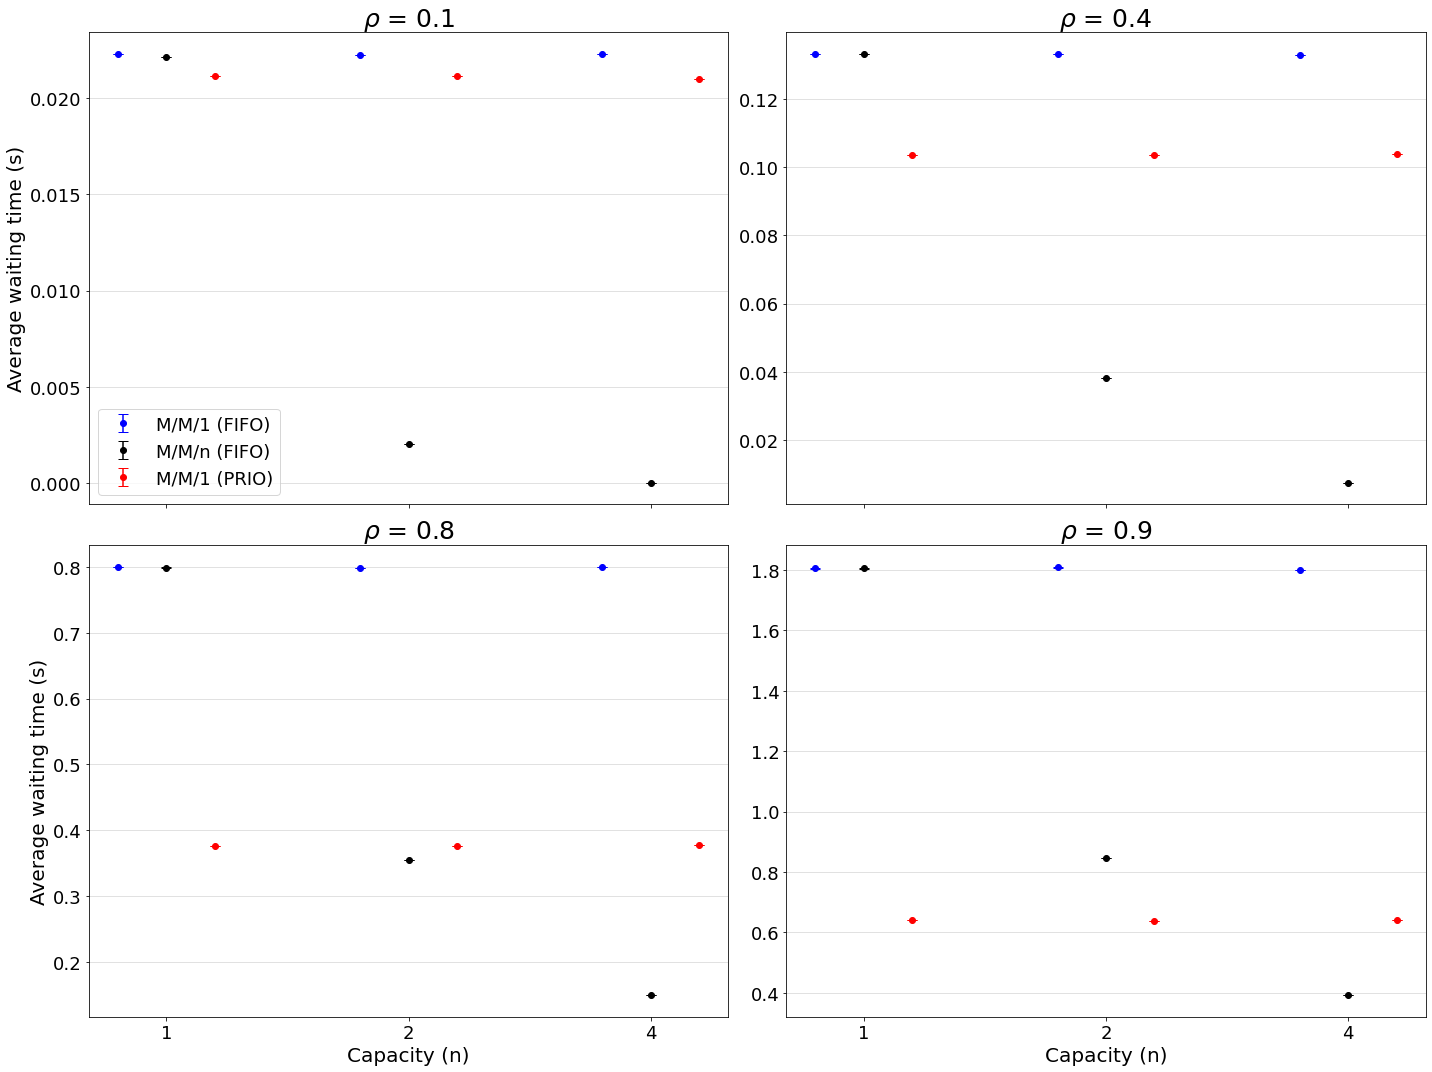

In [110]:
fig, axs = plt.subplots(2, 2, figsize = (20, 15), sharex = True)

axs[0, 0].tick_params(axis = 'both', labelsize = 18)
axs[1, 0].tick_params(axis = 'both', labelsize = 18)
axs[0, 1].tick_params(axis = 'both', labelsize = 18)
axs[1, 1].tick_params(axis = 'both', labelsize = 18)

# System load = 0.1
axs[0,0].errorbar(0.8, np.average(waiting_times_1_1['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_1_1['1']) / np.sqrt(repeats), color = 'blue', capsize = 5, label = 'M/M/1 (FIFO)')
axs[0,0].errorbar(1, np.average(waiting_times_n_1['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_n_1['1']) / np.sqrt(repeats), color = 'black', capsize = 5, label = 'M/M/n (FIFO)')
axs[0,0].errorbar(1.2, np.average(waiting_times_prio_1['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_prio_1['1']) / np.sqrt(repeats), color = 'red', capsize = 5, label = 'M/M/1 (PRIO)')

axs[0,0].errorbar(1.8, np.average(waiting_times_1_1['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_1_1['2']) / np.sqrt(repeats), color = 'blue', capsize = 5)
axs[0,0].errorbar(2, np.average(waiting_times_n_1['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_n_1['2']) / np.sqrt(repeats), color = 'black', capsize = 5)
axs[0,0].errorbar(2.2, np.average(waiting_times_prio_1['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_prio_1['2']) / np.sqrt(repeats), color = 'red', capsize = 5)

axs[0,0].errorbar(2.8, np.average(waiting_times_1_1['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_1_1['4']) / np.sqrt(repeats), color = 'blue', capsize = 5)
axs[0,0].errorbar(3, np.average(waiting_times_n_1['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_n_1['4']) / np.sqrt(repeats), color = 'black', capsize = 5)
axs[0,0].errorbar(3.2, np.average(waiting_times_prio_1['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_prio_1['4']) / np.sqrt(repeats), color = 'red', capsize = 5)
axs[0,0].legend(fontsize = 18)

# System load = 0.4
axs[0,1].errorbar(0.8, np.average(waiting_times_1_4['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_1_4['1']) / np.sqrt(repeats), color = 'blue', capsize = 5, label = 'M/M/1 (FIFO)')
axs[0,1].errorbar(1, np.average(waiting_times_n_4['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_n_4['1']) / np.sqrt(repeats), color = 'black', capsize = 5, label = 'M/M/n (FIFO)')
axs[0,1].errorbar(1.2, np.average(waiting_times_prio_4['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_prio_4['1']) / np.sqrt(repeats), color = 'red', capsize = 5, label = 'M/M/1 (PRIO)')

axs[0,1].errorbar(1.8, np.average(waiting_times_1_4['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_1_4['2']) / np.sqrt(repeats), color = 'blue', capsize = 5)
axs[0,1].errorbar(2, np.average(waiting_times_n_4['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_n_4['2']) / np.sqrt(repeats), color = 'black', capsize = 5)
axs[0,1].errorbar(2.2, np.average(waiting_times_prio_4['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_prio_4['2']) / np.sqrt(repeats), color = 'red', capsize = 5)

axs[0,1].errorbar(2.8, np.average(waiting_times_1_4['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_1_4['4']) / np.sqrt(repeats), color = 'blue', capsize = 5)
axs[0,1].errorbar(3, np.average(waiting_times_n_4['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_n_4['4']) / np.sqrt(repeats), color = 'black', capsize = 5)
axs[0,1].errorbar(3.2, np.average(waiting_times_prio_4['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_prio_4['4']) / np.sqrt(repeats), color = 'red', capsize = 5)

# System load = 0.8
axs[1,0].errorbar(0.8, np.average(waiting_times_1_8['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_1_8['1']) / np.sqrt(repeats), color = 'blue', capsize = 5, label = 'M/M/1 (FIFO)')
axs[1,0].errorbar(1, np.average(waiting_times_n_8['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_n_8['1']) / np.sqrt(repeats), color = 'black', capsize = 5, label = 'M/M/n (FIFO)')
axs[1,0].errorbar(1.2, np.average(waiting_times_prio_8['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_prio_8['1']) / np.sqrt(repeats), color = 'red', capsize = 5, label = 'M/M/1 (PRIO)')

axs[1,0].errorbar(1.8, np.average(waiting_times_1_8['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_1_8['2']) / np.sqrt(repeats), color = 'blue', capsize = 5)
axs[1,0].errorbar(2, np.average(waiting_times_n_8['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_n_8['2']) / np.sqrt(repeats), color = 'black', capsize = 5)
axs[1,0].errorbar(2.2, np.average(waiting_times_prio_8['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_prio_8['2']) / np.sqrt(repeats), color = 'red', capsize = 5)

axs[1,0].errorbar(2.8, np.average(waiting_times_1_8['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_1_8['4']) / np.sqrt(repeats), color = 'blue', capsize = 5)
axs[1,0].errorbar(3, np.average(waiting_times_n_8['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_n_8['4']) / np.sqrt(repeats), color = 'black', capsize = 5)
axs[1,0].errorbar(3.2, np.average(waiting_times_prio_8['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_prio_8['4']) / np.sqrt(repeats), color = 'red', capsize = 5)

# System load = 0.9
axs[1,1].errorbar(0.8, np.average(waiting_times_1_9['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_1_9['1']) / np.sqrt(repeats), color = 'blue', capsize = 5, label = 'M/M/1 (FIFO)')
axs[1,1].errorbar(1, np.average(waiting_times_n_9['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_n_9['1']) / np.sqrt(repeats), color = 'black', capsize = 5, label = 'M/M/n (FIFO)')
axs[1,1].errorbar(1.2, np.average(waiting_times_prio_9['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_prio_9['1']) / np.sqrt(repeats), color = 'red', capsize = 5, label = 'M/M/1 (PRIO)')

axs[1,1].errorbar(1.8, np.average(waiting_times_1_9['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_1_9['2']) / np.sqrt(repeats), color = 'blue', capsize = 5)
axs[1,1].errorbar(2, np.average(waiting_times_n_9['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_n_9['2']) / np.sqrt(repeats), color = 'black', capsize = 5)
axs[1,1].errorbar(2.2, np.average(waiting_times_prio_9['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_prio_9['2']) / np.sqrt(repeats), color = 'red', capsize = 5)

axs[1,1].errorbar(2.8, np.average(waiting_times_1_9['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_1_9['4']) / np.sqrt(repeats), color = 'blue', capsize = 5)
axs[1,1].errorbar(3, np.average(waiting_times_n_9['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_n_9['4']) / np.sqrt(repeats), color = 'black', capsize = 5)
axs[1,1].errorbar(3.2, np.average(waiting_times_prio_9['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_prio_9['4']) / np.sqrt(repeats), color = 'red', capsize = 5)

for ax in axs.flat:
    ax.grid(linewidth = .75, axis = 'y', alpha = 0.5)
    ax.set_xticks([1, 2, 3], ['1', '2', '4'], fontsize = 18)

axs[0,0].set_ylabel('Average waiting time (s)', fontsize = 20)
axs[1,0].set_ylabel('Average waiting time (s)', fontsize = 20)
axs[1,0].set_xlabel('Capacity (n)', fontsize = 20)
axs[1,1].set_xlabel('Capacity (n)', fontsize = 20)

axs[0,0].set_title(r'$\rho$ = 0.1', fontsize = 25)
axs[0,1].set_title(r'$\rho$ = 0.4', fontsize = 25)
axs[1,0].set_title(r'$\rho$ = 0.8', fontsize = 25)
axs[1,1].set_title(r'$\rho$ = 0.9', fontsize = 25)

plt.tight_layout()
plt.savefig('mm1vsmmn.pdf')
plt.show()

### Effect of service time distribution on the average waiting time

#### System load = 0.1

In [87]:
# Settings of the system
n_jobs = 10_000

arrival_rate = 0.1
service_time = 1

In [88]:
# Creating the M/D/n system with n = 1
system_d_n = server_system(n_jobs, n_servers[0], arrival_rate, service_time, service_process='deterministic')
# Creating the M/D/1 system
system_d_1 = server_system(n_jobs, 1, arrival_rate, service_time, service_process='deterministic')

# Creating the M/H/n system with n = 1
system_h_n = server_system(n_jobs, n_servers[0], arrival_rate, service_time / 2, service_process='hyperexponential')
# Creating the M/H/1 system
system_h_1 = server_system(n_jobs, 1, arrival_rate, service_time / 2, service_process='hyperexponential')

In [89]:
# Create dictionaries to store the data
waiting_times_d_n_1 = dict()
waiting_times_d_1_1 = dict()
waiting_times_h_n_1 = dict()
waiting_times_h_1_1 = dict()

for i in n_servers:
    
    # Change capapcity in the M/D/n and M/H/n queue and increase arrival rate to keep the system load constant
    system_d_n.set_n_servers(i)
    system_d_n.arrival_rate = arrival_rate * i
    system_h_n.set_n_servers(i)
    system_h_n.arrival_rate = arrival_rate * i
    
    waiting_times_d_n_1["%s" % i] = []
    waiting_times_d_1_1["%s" % i] = []
    waiting_times_h_n_1["%s" % i] = []
    waiting_times_h_1_1["%s" % i] = []
    
    for _ in range(repeats):
        # Run the systems
        system_d_n.run()
        system_d_1.run()
        system_h_n.run()
        system_h_1.run()
    
        # Store the waiting times
        waiting_times_d_n_1["%s" % i].append(np.average(system_d_n.waiting_times))
        waiting_times_d_1_1["%s" % i].append(np.average(system_d_1.waiting_times))
        waiting_times_h_n_1["%s" % i].append(np.average(system_h_n.waiting_times))
        waiting_times_h_1_1["%s" % i].append(np.average(system_h_1.waiting_times))

In [90]:
for i in n_servers:
    print("%s:" % i, np.average(waiting_times_d_n_1["%s" % i]), np.average(waiting_times_d_1_1["%s" % i]), np.average(waiting_times_h_n_1["%s" % i]), np.average(waiting_times_h_1_1["%s" % i]))

1: 0.05544248133786759 0.05549466331754198 0.19327823113299625 0.19397811361670697
2: 0.006265690992768129 0.055406581253586766 0.015081923568193574 0.19558327041094714
4: 0.000161385127859418 0.05557242079250872 0.0002909206716254029 0.19369052226602704


#### System load = 0.4

In [93]:
# Settings of the system
arrival_rate = 0.4
service_time = 1

system_d_n.arrival_rate = arrival_rate
system_d_1.arrival_rate = arrival_rate
system_h_n.arrival_rate = arrival_rate
system_h_1.arrival_rate = arrival_rate

In [94]:
# Create dictionaries to store the data
waiting_times_d_n_4 = dict()
waiting_times_d_1_4 = dict()
waiting_times_h_n_4 = dict()
waiting_times_h_1_4 = dict()

for i in n_servers:
    
    # Change capapcity in the M/D/n and M/H/n queue and increase arrival rate to keep the system load constant
    system_d_n.set_n_servers(i)
    system_d_n.arrival_rate = arrival_rate * i
    system_h_n.set_n_servers(i)
    system_h_n.arrival_rate = arrival_rate * i
    
    waiting_times_d_n_4["%s" % i] = []
    waiting_times_d_1_4["%s" % i] = []
    waiting_times_h_n_4["%s" % i] = []
    waiting_times_h_1_4["%s" % i] = []
    
    for _ in range(repeats):
        # Run the systems
        system_d_n.run()
        system_d_1.run()
        system_h_n.run()
        system_h_1.run()
    
        # Store the waiting times
        waiting_times_d_n_4["%s" % i].append(np.average(system_d_n.waiting_times))
        waiting_times_d_1_4["%s" % i].append(np.average(system_d_1.waiting_times))
        waiting_times_h_n_4["%s" % i].append(np.average(system_h_n.waiting_times))
        waiting_times_h_1_4["%s" % i].append(np.average(system_h_1.waiting_times))

In [95]:
for i in n_servers:
    print("%s:" % i, np.average(waiting_times_d_n_4["%s" % i]), np.average(waiting_times_d_1_4["%s" % i]), np.average(waiting_times_h_n_4["%s" % i]), np.average(waiting_times_h_1_4["%s" % i]))

1: 0.3324496042574027 0.3326598913803209 1.1672655378269605 1.1658543572316524
2: 0.10262587234067383 0.3330525731349965 0.30658987845582336 1.1670237462036186
4: 0.022681965183576423 0.3334892594193932 0.05540364256814675 1.16721245109117


#### System load = 0.8

In [97]:
n_jobs = 100_000

arrival_rate = 0.8
service_time = 1

system_d_n.arrival_rate = arrival_rate
system_d_1.arrival_rate = arrival_rate
system_h_n.arrival_rate = arrival_rate
system_h_1.arrival_rate = arrival_rate

system_d_n.n_jobs = n_jobs
system_d_1.n_jobs = n_jobs
system_h_n.n_jobs = n_jobs
system_h_1.n_jobs = n_jobs

In [98]:
# Create dictionaries to store the data
waiting_times_d_n_8 = dict()
waiting_times_d_1_8 = dict()
waiting_times_h_n_8 = dict()
waiting_times_h_1_8 = dict()

for i in n_servers:
    
    # Change capapcity in the M/D/n and M/H/n queue and increase arrival rate to keep the system load constant
    system_d_n.set_n_servers(i)
    system_d_n.arrival_rate = arrival_rate * i
    system_h_n.set_n_servers(i)
    system_h_n.arrival_rate = arrival_rate * i
    
    waiting_times_d_n_8["%s" % i] = []
    waiting_times_d_1_8["%s" % i] = []
    waiting_times_h_n_8["%s" % i] = []
    waiting_times_h_1_8["%s" % i] = []
    
    for _ in range(repeats):
        # Run the systems
        system_d_n.run()
        system_d_1.run()
        system_h_n.run()
        system_h_1.run()
    
        # Store the waiting times
        waiting_times_d_n_8["%s" % i].append(np.average(system_d_n.waiting_times))
        waiting_times_d_1_8["%s" % i].append(np.average(system_d_1.waiting_times))
        waiting_times_h_n_8["%s" % i].append(np.average(system_h_n.waiting_times))
        waiting_times_h_1_8["%s" % i].append(np.average(system_h_1.waiting_times))

In [99]:
for i in n_servers:
    print("%s:" % i, np.average(waiting_times_d_n_8["%s" % i]), np.average(waiting_times_d_1_8["%s" % i]), np.average(waiting_times_h_n_8["%s" % i]), np.average(waiting_times_h_1_8["%s" % i]))

1: 1.9985742182250181 1.9978609024449645 6.974299500018073 7.0073323217562775
2: 0.9000321037097296 2.0016580476916306 3.065858113220072 7.007138865757861
4: 0.3877172299647745 2.001257782220073 1.249619720154457 6.988300660729478


#### System load = 0.9

In [101]:
arrival_rate = 0.9
service_time = 1

system_d_n.arrival_rate = arrival_rate
system_d_1.arrival_rate = arrival_rate
system_h_n.arrival_rate = arrival_rate
system_h_1.arrival_rate = arrival_rate

In [102]:
# Create dictionaries to store the data
waiting_times_d_n_9 = dict()
waiting_times_d_1_9 = dict()
waiting_times_h_n_9 = dict()
waiting_times_h_1_9 = dict()

for i in n_servers:
    
    # Change capapcity in the M/D/n and M/H/n queue and increase arrival rate to keep the system load constant
    system_d_n.set_n_servers(i)
    system_d_n.arrival_rate = arrival_rate * i
    system_h_n.set_n_servers(i)
    system_h_n.arrival_rate = arrival_rate * i
    
    waiting_times_d_n_9["%s" % i] = []
    waiting_times_d_1_9["%s" % i] = []
    waiting_times_h_n_9["%s" % i] = []
    waiting_times_h_1_9["%s" % i] = []
    
    for _ in range(repeats):
        # Run the systems
        system_d_n.run()
        system_d_1.run()
        system_h_n.run()
        system_h_1.run()
    
        # Store the waiting times
        waiting_times_d_n_9["%s" % i].append(np.average(system_d_n.waiting_times))
        waiting_times_d_1_9["%s" % i].append(np.average(system_d_1.waiting_times))
        waiting_times_h_n_9["%s" % i].append(np.average(system_h_n.waiting_times))
        waiting_times_h_1_9["%s" % i].append(np.average(system_h_1.waiting_times))

In [103]:
for i in n_servers:
    print("%s:" % i, np.average(waiting_times_d_n_9["%s" % i]), np.average(waiting_times_d_1_9["%s" % i]), np.average(waiting_times_h_n_9["%s" % i]), np.average(waiting_times_h_1_9["%s" % i]))

1: 4.498630585498959 4.496274093259721 15.675368330098095 15.664443605480528
2: 2.140364536031368 4.493808407244511 7.382938078209523 15.777019969732027
4: 0.9979158239904007 4.5088421337810765 3.3718941630812322 15.783826594636189


#### Plot

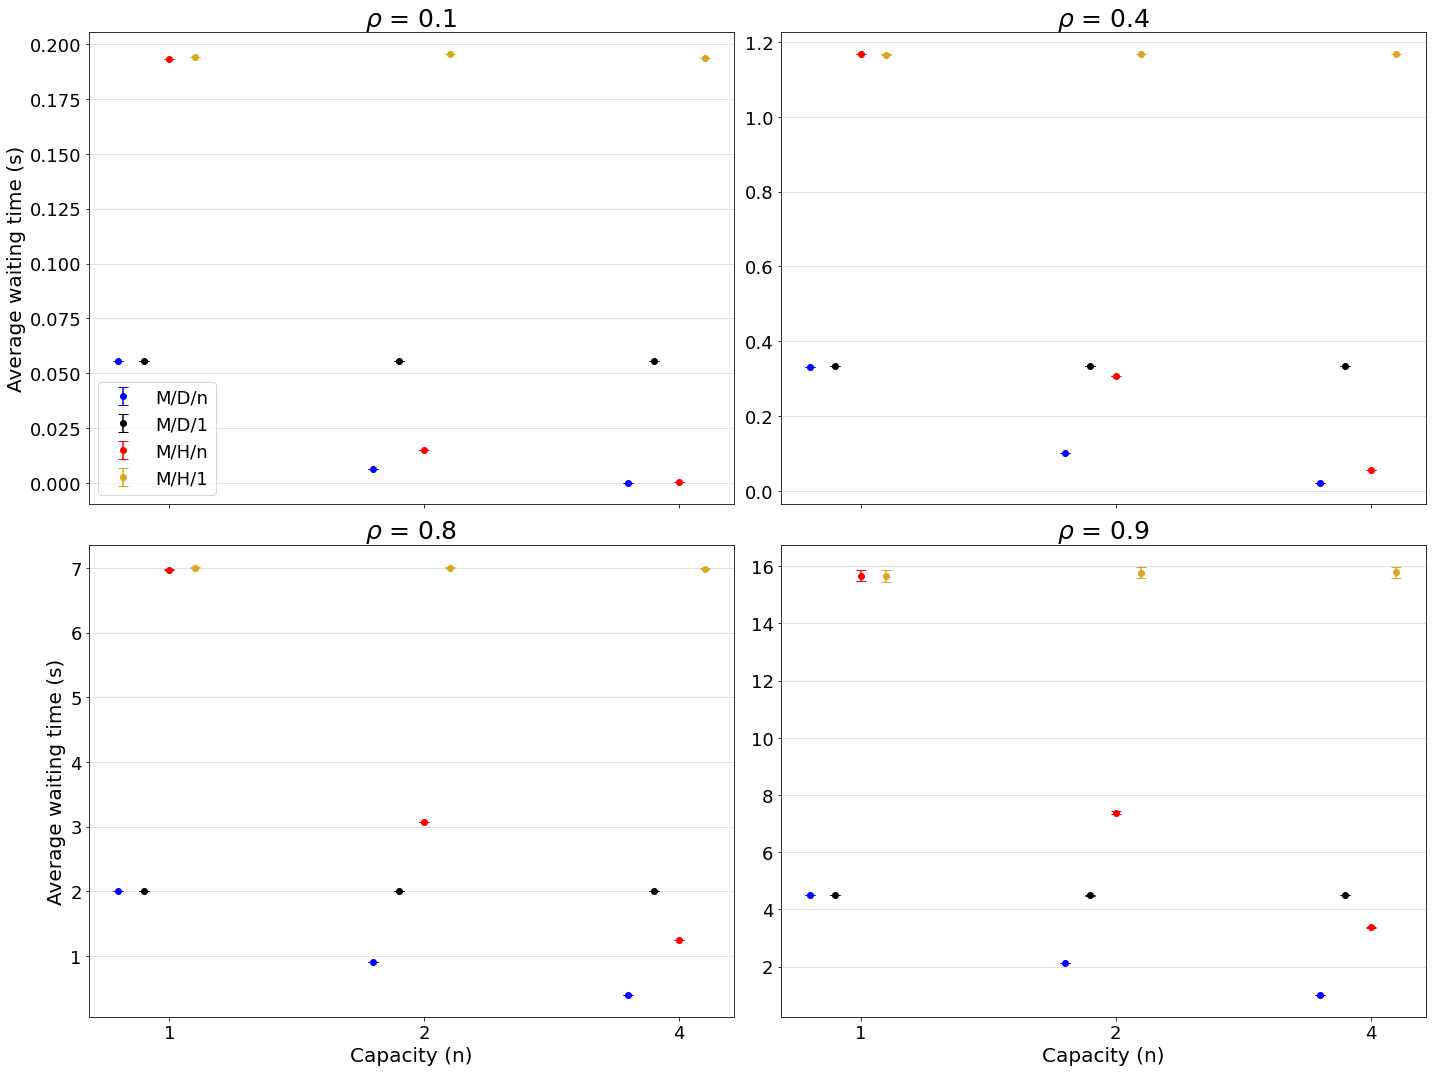

In [109]:
fig, axs = plt.subplots(2, 2, figsize = (20, 15), sharex = True)

axs[0, 0].tick_params(axis = 'both', labelsize = 18)
axs[1, 0].tick_params(axis = 'both', labelsize = 18)
axs[0, 1].tick_params(axis = 'both', labelsize = 18)
axs[1, 1].tick_params(axis = 'both', labelsize = 18)

# System load = 0.1
axs[0,0].errorbar(0.8, np.average(waiting_times_d_n_1['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_n_1['1']) / np.sqrt(repeats), color = 'blue', capsize = 5, label = 'M/D/n')
axs[0,0].errorbar(0.9, np.average(waiting_times_d_1_1['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_1_1['1']) / np.sqrt(repeats), color = 'black', capsize = 5, label = 'M/D/1')
axs[0,0].errorbar(1.0, np.average(waiting_times_h_n_1['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_n_1['1']) / np.sqrt(repeats), color = 'red', capsize = 5, label = 'M/H/n')
axs[0,0].errorbar(1.1, np.average(waiting_times_h_1_1['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_1_1['1']) / np.sqrt(repeats), color = 'goldenrod', capsize = 5, label = 'M/H/1')

axs[0,0].errorbar(1.8, np.average(waiting_times_d_n_1['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_n_1['2']) / np.sqrt(repeats), color = 'blue', capsize = 5)
axs[0,0].errorbar(1.9, np.average(waiting_times_d_1_1['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_1_1['2']) / np.sqrt(repeats), color = 'black', capsize = 5)
axs[0,0].errorbar(2.0, np.average(waiting_times_h_n_1['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_n_1['2']) / np.sqrt(repeats), color = 'red', capsize = 5)
axs[0,0].errorbar(2.1, np.average(waiting_times_h_1_1['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_1_1['2']) / np.sqrt(repeats), color = 'goldenrod', capsize = 5)

axs[0,0].errorbar(2.8, np.average(waiting_times_d_n_1['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_n_1['4']) / np.sqrt(repeats), color = 'blue', capsize = 5)
axs[0,0].errorbar(2.9, np.average(waiting_times_d_1_1['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_1_1['4']) / np.sqrt(repeats), color = 'black', capsize = 5)
axs[0,0].errorbar(3.0, np.average(waiting_times_h_n_1['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_n_1['4']) / np.sqrt(repeats), color = 'red', capsize = 5)
axs[0,0].errorbar(3.1, np.average(waiting_times_h_1_1['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_1_1['4']) / np.sqrt(repeats), color = 'goldenrod', capsize = 5)
axs[0,0].legend(fontsize = 18)

# System load = 0.4
axs[0,1].errorbar(0.8, np.average(waiting_times_d_n_4['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_n_4['1']) / np.sqrt(repeats), color = 'blue', capsize = 5, label = 'M/D/n')
axs[0,1].errorbar(0.9, np.average(waiting_times_d_1_4['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_1_4['1']) / np.sqrt(repeats), color = 'black', capsize = 5, label = 'M/D/1')
axs[0,1].errorbar(1.0, np.average(waiting_times_h_n_4['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_n_4['1']) / np.sqrt(repeats), color = 'red', capsize = 5, label = 'M/H/n')
axs[0,1].errorbar(1.1, np.average(waiting_times_h_1_4['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_1_4['1']) / np.sqrt(repeats), color = 'goldenrod', capsize = 5, label = 'M/H/1')

axs[0,1].errorbar(1.8, np.average(waiting_times_d_n_4['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_n_4['2']) / np.sqrt(repeats), color = 'blue', capsize = 5)
axs[0,1].errorbar(1.9, np.average(waiting_times_d_1_4['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_1_4['2']) / np.sqrt(repeats), color = 'black', capsize = 5)
axs[0,1].errorbar(2.0, np.average(waiting_times_h_n_4['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_n_4['2']) / np.sqrt(repeats), color = 'red', capsize = 5)
axs[0,1].errorbar(2.1, np.average(waiting_times_h_1_4['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_1_4['2']) / np.sqrt(repeats), color = 'goldenrod', capsize = 5)

axs[0,1].errorbar(2.8, np.average(waiting_times_d_n_4['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_n_4['4']) / np.sqrt(repeats), color = 'blue', capsize = 5)
axs[0,1].errorbar(2.9, np.average(waiting_times_d_1_4['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_1_4['4']) / np.sqrt(repeats), color = 'black', capsize = 5)
axs[0,1].errorbar(3.0, np.average(waiting_times_h_n_4['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_n_4['4']) / np.sqrt(repeats), color = 'red', capsize = 5)
axs[0,1].errorbar(3.1, np.average(waiting_times_h_1_4['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_1_4['4']) / np.sqrt(repeats), color = 'goldenrod', capsize = 5)

# System load = 0.8
axs[1,0].errorbar(0.8, np.average(waiting_times_d_n_8['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_n_8['1']) / np.sqrt(repeats), color = 'blue', capsize = 5, label = 'M/D/n')
axs[1,0].errorbar(0.9, np.average(waiting_times_d_1_8['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_1_8['1']) / np.sqrt(repeats), color = 'black', capsize = 5, label = 'M/D/1')
axs[1,0].errorbar(1.0, np.average(waiting_times_h_n_8['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_n_8['1']) / np.sqrt(repeats), color = 'red', capsize = 5, label = 'M/H/n')
axs[1,0].errorbar(1.1, np.average(waiting_times_h_1_8['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_1_8['1']) / np.sqrt(repeats), color = 'goldenrod', capsize = 5, label = 'M/H/1')

axs[1,0].errorbar(1.8, np.average(waiting_times_d_n_8['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_n_8['2']) / np.sqrt(repeats), color = 'blue', capsize = 5)
axs[1,0].errorbar(1.9, np.average(waiting_times_d_1_8['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_1_8['2']) / np.sqrt(repeats), color = 'black', capsize = 5)
axs[1,0].errorbar(2.0, np.average(waiting_times_h_n_8['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_n_8['2']) / np.sqrt(repeats), color = 'red', capsize = 5)
axs[1,0].errorbar(2.1, np.average(waiting_times_h_1_8['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_1_8['2']) / np.sqrt(repeats), color = 'goldenrod', capsize = 5)

axs[1,0].errorbar(2.8, np.average(waiting_times_d_n_8['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_n_8['4']) / np.sqrt(repeats), color = 'blue', capsize = 5)
axs[1,0].errorbar(2.9, np.average(waiting_times_d_1_8['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_1_8['4']) / np.sqrt(repeats), color = 'black', capsize = 5)
axs[1,0].errorbar(3.0, np.average(waiting_times_h_n_8['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_n_8['4']) / np.sqrt(repeats), color = 'red', capsize = 5)
axs[1,0].errorbar(3.1, np.average(waiting_times_h_1_8['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_1_8['4']) / np.sqrt(repeats), color = 'goldenrod', capsize = 5)


# System load = 0.9
axs[1,1].errorbar(0.8, np.average(waiting_times_d_n_9['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_n_9['1']) / np.sqrt(repeats), color = 'blue', capsize = 5, label = 'M/D/n')
axs[1,1].errorbar(0.9, np.average(waiting_times_d_1_9['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_1_9['1']) / np.sqrt(repeats), color = 'black', capsize = 5, label = 'M/D/1')
axs[1,1].errorbar(1.0, np.average(waiting_times_h_n_9['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_n_9['1']) / np.sqrt(repeats), color = 'red', capsize = 5, label = 'M/H/n')
axs[1,1].errorbar(1.1, np.average(waiting_times_h_1_9['1']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_1_9['1']) / np.sqrt(repeats), color = 'goldenrod', capsize = 5, label = 'M/H/1')

axs[1,1].errorbar(1.8, np.average(waiting_times_d_n_9['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_n_9['2']) / np.sqrt(repeats), color = 'blue', capsize = 5)
axs[1,1].errorbar(1.9, np.average(waiting_times_d_1_9['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_1_9['2']) / np.sqrt(repeats), color = 'black', capsize = 5)
axs[1,1].errorbar(2.0, np.average(waiting_times_h_n_9['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_n_9['2']) / np.sqrt(repeats), color = 'red', capsize = 5)
axs[1,1].errorbar(2.1, np.average(waiting_times_h_1_9['2']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_1_9['2']) / np.sqrt(repeats), color = 'goldenrod', capsize = 5)

axs[1,1].errorbar(2.8, np.average(waiting_times_d_n_9['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_n_9['4']) / np.sqrt(repeats), color = 'blue', capsize = 5)
axs[1,1].errorbar(2.9, np.average(waiting_times_d_1_9['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_d_1_9['4']) / np.sqrt(repeats), color = 'black', capsize = 5)
axs[1,1].errorbar(3.0, np.average(waiting_times_h_n_9['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_n_9['4']) / np.sqrt(repeats), color = 'red', capsize = 5)
axs[1,1].errorbar(3.1, np.average(waiting_times_h_1_9['4']), fmt='o', yerr= 1.96 * np.var(waiting_times_h_1_9['4']) / np.sqrt(repeats), color = 'goldenrod', capsize = 5)


for ax in axs.flat:
    ax.grid(linewidth = .75, axis = 'y', alpha = 0.5)
    ax.set_xticks([1, 2, 3], ['1', '2', '4'], fontsize = 18)

axs[0,0].set_ylabel('Average waiting time (s)', fontsize = 20)
axs[1,0].set_ylabel('Average waiting time (s)', fontsize = 20)
axs[1,0].set_xlabel('Capacity (n)', fontsize = 20)
axs[1,1].set_xlabel('Capacity (n)', fontsize = 20)

axs[0,0].set_title(r'$\rho$ = 0.1', fontsize = 25)
axs[0,1].set_title(r'$\rho$ = 0.4', fontsize = 25)
axs[1,0].set_title(r'$\rho$ = 0.8', fontsize = 25)
axs[1,1].set_title(r'$\rho$ = 0.9', fontsize = 25)

plt.tight_layout()
plt.savefig('md_vs_mh.pdf')
plt.show()